#Trabalho prático # 3
##Introdução à Computação Numérica

###Tópico: Interpolação polinomial 

---

Nome: *Riquelme Freitas Gomes*

DRE: *120032785*


---

**Instruções:** 

**Preencha o notebook** com seus dados, seus códigos e **rode todos os códigos** 

**Inclua  um relatório, na parte final do notebook,** com suas conclusões, respostas, observações e comentários relacionados com os tópicos e questões abordadas nas tarefas.  

**A elaboração dos códigos pode ser realizada em duplas, mas o resto do trabalho é individual.**

*Se você fez o seu trabalho em dupla inclua essa informação no relatório. Além disso, se você  também recebeu ajuda de um(a) colega/amigo(a) ou consultou/usou informações da internet ou outras fontes, coloque referências à elas no seu relatório.*


**Entrega do trabalho:**

*Data de entrega: 20/novembro/2022* 

---

## Tarefa #1: Avaliando o polinômio interpolador

Implemente funções em Python para avaliar o polinômio interpolador $p_n(x)$, considerando como dados de entrada o valor de $x$ e duas listas contemdo os valores dos $x_i$ e dos $y_i$ ($i=0,\dots,n$), respectivamente.

a) Use o polinômio interpolador na forma de Lagrange:
$$
p_n(x) = \sum_{i=0}^n y_i \prod_{j=0\\j\neq i}^n \left(\frac{x-x_j}{x_i-x_j}\right).
$$

b) Use o polinômio interpolador na forma de Newton:
$$
p_n(x) = c_0 + c_1(x-x_0)+\cdots+c_n(x-x_0)\cdots(x-x_{n-1}),
$$ 
em que $$c_i = f[x_0,\dots,x_i], \quad i=0,\dots,n.$$
Observe que o processo de avaliação pode ser simplificado re-escrevendo o polinômio como
$$
  p_n(x) = c_0 + (x-x_0)(c_1+(x-x_1)(\cdots c_{n-1}+c_n(x-x_{n-1})\cdots)).
$$ 


In [ ]:
# a) Polinômio interpolador na forma de Lagrange

def pol_lagrange(x, lista_x, lista_y):
  n = len(lista_x)
  polinomio = 0

  for i in range(n):
    produtorio = 1 
    for j in range(n):
      if(i != j): produtorio *= ( (x - lista_x[j]) / (lista_x[i] - lista_x[j]) )

    polinomio += lista_y[i] * produtorio
  
  return polinomio

In [ ]:
# b) Polinômio interpolador na forma de Newton

def pol_newton(x, lista_x, lista_y):
  qtd_pontos = len(lista_x)
  polinomio = 0
  produtorio = 1
  tabela = []
  tabela.append(lista_y)

  passo = 1
  for n in range(qtd_pontos - 1):
    ordem = []
    for m in range(len(tabela[n]) - 1):
      dif_dividida = (tabela[n][m+1] - tabela[n][m]) / (lista_x[m+passo] - lista_x[m])
      ordem.append(dif_dividida)
    tabela.append(ordem)
    passo += 1

  for i in range(qtd_pontos):
    polinomio += (tabela[i][0] * produtorio)
    produtorio *= (x - lista_x[i]) 
  
  return polinomio

##Tarefa #2

a) Fenômeno de Runge.

Dada a função de Runge $f(x) = \frac{1}{1+25 x^2}$, considere o polinômio interpolador $p_n(x)$ sob os pontos $(x_i, f(x_i))$ com $$x_i = -1+ \frac{2 i}{n},\quad i=0,\dots,n.$$ Para $n=5, 10, 15$ e $20$, obtenha o valor máximo do erro de interpolação nos pontos de controle correspondentes à $$x_j^\prime = -1+ \frac{2 j+1}{100}, \quad j=0,\dots,99,$$ ou seja, calcular
$$E_n = \max_{j=0,\dots,99} |f(x_j^\prime) - p_n(x_j^\prime)|.$$

b) Re-faça o item a), mas usando os **nós de Chebyshev**: $$x_i = \cos({i\pi}/{n}),\quad i=0,\dots,n.$$

c) Discuta e explique os resultados obtidos em a) e b).

**Indicação:** Use formas diferentes do polinômio interpolador na solução dos itens a) e b).

In [ ]:
# a) Fenômeno de Runge

n = [5, 10, 15, 20]

for valor in n:
  lista_x, lista_y = [], []
  erro_maximo_lg, erro_maximo_nt = -1, -1
  print(f"(Para n = {valor})")

  for i in range(valor+1):
    lista_x.append(-1 + (2*i / valor))
    lista_y.append(1 / (1 + 25*(lista_x[i]**2)))
    
  for j in range(100):
    ponto_de_controle = -1 + ((2*j + 1) / 100)
    y = 1 / (1 + 25*(ponto_de_controle**2))
    erro_lg = abs(y - pol_lagrange(ponto_de_controle, lista_x, lista_y))  # Na forma de Lagrange
    erro_nt = abs(y - pol_newton(ponto_de_controle, lista_x, lista_y))    # Na forma de Newton
    if(erro_lg > erro_maximo_lg): erro_maximo_lg = erro_lg
    if(erro_nt > erro_maximo_nt): erro_maximo_nt = erro_nt

  print(f"FORMA DE LAGRANGE: Valor máximo do erro = {erro_maximo_lg}")
  print(f"FORMA DE NEWTON:   Valor máximo do erro = {erro_maximo_nt}\n")

(Para n = 5)
FORMA DE LAGRANGE: Valor máximo do erro = 0.4303716070101189
FORMA DE NEWTON:   Valor máximo do erro = 0.4303716070101189

(Para n = 10)
FORMA DE LAGRANGE: Valor máximo do erro = 1.8837448249769233
FORMA DE NEWTON:   Valor máximo do erro = 1.8837448249770095

(Para n = 15)
FORMA DE LAGRANGE: Valor máximo do erro = 2.058892753801137
FORMA DE NEWTON:   Valor máximo do erro = 2.0588927538022834

(Para n = 20)
FORMA DE LAGRANGE: Valor máximo do erro = 58.58548660787429
FORMA DE NEWTON:   Valor máximo do erro = 58.58548660787331



In [ ]:
# b) Nós de Chebyshev

import math
n = [5, 10, 15, 20]

for valor in n:
  lista_x, lista_y = [], []
  erro_maximo_lg, erro_maximo_nt = -1, -1
  print(f"(Para n = {valor})")

  for i in range(valor+1):
    lista_x.append(math.cos(i*math.pi / valor))
    lista_y.append(1 / (1 + 25*(lista_x[i]**2)))
    
  for j in range(100):
    ponto_de_controle = -1 + ((2*j + 1) / 100)
    y = 1 / (1 + 25*(ponto_de_controle**2))
    erro_lg = abs(y - pol_lagrange(ponto_de_controle, lista_x, lista_y))  # Na forma de Lagrange
    erro_nt = abs(y - pol_newton(ponto_de_controle, lista_x, lista_y))    # Na forma de Newton
    if(erro_lg > erro_maximo_lg): erro_maximo_lg = erro_lg
    if(erro_nt > erro_maximo_nt): erro_maximo_nt = erro_nt

  print(f"FORMA DE LAGRANGE: Valor máximo do erro = {erro_maximo_lg}")
  print(f"FORMA DE NEWTON:   Valor máximo do erro = {erro_maximo_nt}\n")

(Para n = 5)
FORMA DE LAGRANGE: Valor máximo do erro = 0.6362207729572498
FORMA DE NEWTON:   Valor máximo do erro = 0.6362207729572498

(Para n = 10)
FORMA DE LAGRANGE: Valor máximo do erro = 0.1320169241531256
FORMA DE NEWTON:   Valor máximo do erro = 0.1320169241531256

(Para n = 15)
FORMA DE LAGRANGE: Valor máximo do erro = 0.09795674113880959
FORMA DE NEWTON:   Valor máximo do erro = 0.09795674113880926

(Para n = 20)
FORMA DE LAGRANGE: Valor máximo do erro = 0.017730299237454006
FORMA DE NEWTON:   Valor máximo do erro = 0.01773029923745356



##Tarefa #3: Aplicação

A seguinte tabela de dados corresponde à concentração de oxigênio dissolvido na água fresca no nível do mar como função da temperatura. 

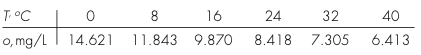

a) Estime o valor de $o(27)$, usando interpolação

i) linear;
ii) quadrática;
iii) cúbica.

b) Compare os valores estimados com o valor exato da concentração de oxigênio dado por $7.986\; mg/L$. Qual polinômio interpolador deu o melhor resultado? Explique.


In [ ]:
# a) Dados da tabela
T = [0, 8, 16, 24, 32, 40]
o = [14.621, 11.843, 9.870, 8.418, 7.305, 6.413]

valor_exato = 7.986
print(f"VALOR EXATO DE o(27): {valor_exato}\nVALOR ESTIMADO PARA o(27) USANDO INTERPOLAÇÃO...\n")

# Linear (2 pontos)
lista_x = [24, 32]
lista_y = [8.418, 7.305]
forma_lg = pol_lagrange(27, lista_x, lista_y)
forma_nt = pol_newton(27, lista_x, lista_y)
print(f"(LINEAR)\nFORMA DE LAGRANGE: {forma_lg}                  ERRO ABSOLUTO: {abs(forma_lg - valor_exato)}")
print(f"FORMA DE NEWTON:   {forma_nt}                  ERRO ABSOLUTO: {abs(forma_nt - valor_exato)}\n")

# Quadrática (3 pontos)
lista_x = [16, 24, 32]
lista_y = [9.870, 8.418, 7.305]
forma_lg = pol_lagrange(27, lista_x, lista_y)
forma_nt = pol_newton(27, lista_x, lista_y)
print(f"(QUADRÁTICA)\nFORMA DE LAGRANGE: {forma_lg}         ERRO ABSOLUTO: {abs(forma_lg - valor_exato)}")
print(f"FORMA DE NEWTON:   {forma_nt}         ERRO ABSOLUTO: {abs(forma_nt - valor_exato)}\n")

# Cúbica (4 pontos)
lista_x = [16, 24, 32, 40]
lista_y = [9.870, 8.418, 7.305, 6.413]
forma_lg = pol_lagrange(27, lista_x, lista_y)
forma_nt = pol_newton(27, lista_x, lista_y)
print(f"(CÚBICA)\nFORMA DE LAGRANGE: {forma_lg}         ERRO ABSOLUTO: {abs(forma_lg - valor_exato)}")
print(f"FORMA DE NEWTON:   {forma_nt}         ERRO ABSOLUTO: {abs(forma_nt - valor_exato)}\n")

VALOR EXATO DE o(27): 7.986
VALOR ESTIMADO PARA o(27) USANDO INTERPOLAÇÃO...

(LINEAR)
FORMA DE LAGRANGE: 8.000625                  ERRO ABSOLUTO: 0.014624999999999666
FORMA DE NEWTON:   8.000625                  ERRO ABSOLUTO: 0.014624999999999666

(QUADRÁTICA)
FORMA DE LAGRANGE: 7.960898437499999         ERRO ABSOLUTO: 0.025101562500000618
FORMA DE NEWTON:   7.960898437499999         ERRO ABSOLUTO: 0.025101562500000618

(CÚBICA)
FORMA DE LAGRANGE: 7.967236328124999         ERRO ABSOLUTO: 0.01876367187500083
FORMA DE NEWTON:   7.967236328124999         ERRO ABSOLUTO: 0.01876367187500083



# **Relatório**

Nome: Riquelme Freitas Gomes \
DRE: 120032785

\
## **Trabalho prático #3**
Os códigos presentes neste documento foram elaborados somente por mim.

\
## **Tarefa #1: Avaliando o polinômio interpolador**
Para essa tarefa, implementei funções em Python para avaliar o polinômio interpolador $p_n(x)$, considerando como dados de entrada o valor de $x$ e duas listas contendo os valores dos $x_i$ e dos $y_i$ ($i=0,\dots,n$), respectivamente.

\
### **a) Forma de Lagrange** 

Nesse item, implementei uma função para o polinômio interpolador na forma de Lagrange, seguindo a fórmula dada abaixo:
$$
p_n(x) = \sum_{i=0}^n y_i \prod_{j=0\\j\neq i}^n \left(\frac{x-x_j}{x_i-x_j}\right).
$$

### **b) Forma de Newton** 
Nesse item, implementei uma função para o polinômio interpolador na forma de Newton, seguindo a fórmula dada abaixo:
$$
p_n(x) = c_0 + c_1(x-x_0)+\cdots+c_n(x-x_0)\cdots(x-x_{n-1}),
$$ 
em que $$c_i = f[x_0,\dots,x_i], \quad i=0,\dots,n.$$

\
## **Tarefa #2:**
### **a) Fenômeno de Runge** 
Para essa item, considerei a função de Runge e os pontos dados para $n=5, 10, 15$ e $20$, para obter o valor máximo do erro de interpolação nos pontos de controle correspondentes à $$x_j^\prime = -1+ \frac{2 j+1}{100}, \quad j=0,\dots,99,$$ ou seja, utilizando a interpolação na forma de Lagrange e na forma de Newton, calculei:
$$E_n = \max_{j=0,\dots,99} |f(x_j^\prime) - p_n(x_j^\prime)|.$$

Obtive os seguintes resultados: 
```
(Para n = 5)
FORMA DE LAGRANGE: Valor máximo do erro = 0.4303716070101189
FORMA DE NEWTON:   Valor máximo do erro = 0.4303716070101189

(Para n = 10)
FORMA DE LAGRANGE: Valor máximo do erro = 1.8837448249769233
FORMA DE NEWTON:   Valor máximo do erro = 1.8837448249770095

(Para n = 15)
FORMA DE LAGRANGE: Valor máximo do erro = 2.058892753801137
FORMA DE NEWTON:   Valor máximo do erro = 2.0588927538022834

(Para n = 20)
FORMA DE LAGRANGE: Valor máximo do erro = 58.58548660787429
FORMA DE NEWTON:   Valor máximo do erro = 58.58548660787331
```
\
### **b) Nós de Chebyshev** 
Para esse item, refiz o item a) mas usando os nós de Chebyshev: $x_i = \cos({i\pi}/{n}),\quad i=0,\dots,n.$ 

Obtive os seguintes resultados:
```
(Para n = 5)
FORMA DE LAGRANGE: Valor máximo do erro = 0.6362207729572498
FORMA DE NEWTON:   Valor máximo do erro = 0.6362207729572498

(Para n = 10)
FORMA DE LAGRANGE: Valor máximo do erro = 0.1320169241531256
FORMA DE NEWTON:   Valor máximo do erro = 0.1320169241531256

(Para n = 15)
FORMA DE LAGRANGE: Valor máximo do erro = 0.09795674113880959
FORMA DE NEWTON:   Valor máximo do erro = 0.09795674113880926

(Para n = 20)
FORMA DE LAGRANGE: Valor máximo do erro = 0.017730299237454006
FORMA DE NEWTON:   Valor máximo do erro = 0.01773029923745356
```

\
### **c) Resultados** 
Resultados obtidos em a)
```
(Para n = 5)
FORMA DE LAGRANGE: Valor máximo do erro = 0.4303716070101189
FORMA DE NEWTON:   Valor máximo do erro = 0.4303716070101189

(Para n = 10)
FORMA DE LAGRANGE: Valor máximo do erro = 1.8837448249769233
FORMA DE NEWTON:   Valor máximo do erro = 1.8837448249770095

(Para n = 15)
FORMA DE LAGRANGE: Valor máximo do erro = 2.058892753801137
FORMA DE NEWTON:   Valor máximo do erro = 2.0588927538022834

(Para n = 20)
FORMA DE LAGRANGE: Valor máximo do erro = 58.58548660787429
FORMA DE NEWTON:   Valor máximo do erro = 58.58548660787331
```
É possível perceber que foram resultados com erros atingindo números até que altos. Quanto maior foi o valor de n, bem maior foi o valor máximo do erro apresentado, tanto na forma de Lagrange quanto na de Newton. Quanto a essas duas formas, elas apresentaram o mesmo resultado para (n = 5), enquanto para (n = 10) e (n = 15) a forma de Lagrange se saiu melhor, para (n = 20) a forma de Newton obteve vantagem, com diferenças bem pequenas.

\
Resultados obtidos em b)
```
(Para n = 5)
FORMA DE LAGRANGE: Valor máximo do erro = 0.6362207729572498
FORMA DE NEWTON:   Valor máximo do erro = 0.6362207729572498

(Para n = 10)
FORMA DE LAGRANGE: Valor máximo do erro = 0.1320169241531256
FORMA DE NEWTON:   Valor máximo do erro = 0.1320169241531256

(Para n = 15)
FORMA DE LAGRANGE: Valor máximo do erro = 0.09795674113880959
FORMA DE NEWTON:   Valor máximo do erro = 0.09795674113880926

(Para n = 20)
FORMA DE LAGRANGE: Valor máximo do erro = 0.017730299237454006
FORMA DE NEWTON:   Valor máximo do erro = 0.01773029923745356
```
Nessa etapa, graças aos nós de Chebyshev que nos conferiram pontos melhores para a interpolação, os valores máximos dos erros caíram significativamente e ficaram todos próximos de 0 para qualquer valor de n. Portanto, a interpolação se mostrou muito mais eficiente com os nós de Chebyshev. Além disso, nesse caso, a lógica se inverteu e agora quanto maior o valor de n menor é o valor máximo do erro. Quanto as formas de interpolação, ambas apresentaram o mesmo valor máximo de erro para (n = 5) e (n = 10). Já para (n = 15) e (n = 20) a forma de Newton obteve, por muito pouco, os melhores resultados.

\
## **Tarefa #3: Aplicação**
### **a) Estimando valores** 
Para essa tarefa, a partir dos dados da tabela, utilizei as funções de interpolação da tarefa 1 para estimar o valor de $o(27)$ com interpolação linear, quadrática e cúbica.

Obtive os seguintes resultados:

```
VALOR EXATO DE o(27): 7.986
VALOR ESTIMADO PARA o(27) USANDO INTERPOLAÇÃO...

(LINEAR)
FORMA DE LAGRANGE: 8.000625                  ERRO ABSOLUTO: 0.014624999999999666
FORMA DE NEWTON:   8.000625                  ERRO ABSOLUTO: 0.014624999999999666

(QUADRÁTICA)
FORMA DE LAGRANGE: 7.960898437499999         ERRO ABSOLUTO: 0.025101562500000618
FORMA DE NEWTON:   7.960898437499999         ERRO ABSOLUTO: 0.025101562500000618

(CÚBICA)
FORMA DE LAGRANGE: 7.967236328124999         ERRO ABSOLUTO: 0.01876367187500083
FORMA DE NEWTON:   7.967236328124999         ERRO ABSOLUTO: 0.01876367187500083
```

### **b) Resultados** 
É possível observar que os valores estimados foram os mesmos tanto com a forma de Lagrange quanto com a forma de Newton. Além disso, por meio dos erros absolutos apresentados, é perceptível que os valores estimados ficaram bem próximos ao valor exato da concentração de oxigênio dado por $7.986\; mg/L$. Com isso em mente, concluo que a interpolação LINEAR manifestou o melhor resultado, visto que apresentou o menor erro absoluto dentre as três formas, isto é, a menor distância para o valor exato da concentração que estamos considerando. Por outro lado, mesmo com um valor bem próximo ao exato, a interpolação QUADRÁTICA obteve o pior resultado. 